In [1]:
import sys

sys.path.append('C:\\Users\\erik_\\Documents\\erik documents\\Programas\\PlasmaSimulations\\src')
# sys.path.append('..\\PlasmaSimulations\\src') # replace .. by the concrete path to the PlasmaSimulations folder

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import os

import AdvectionSolvers

# TECHNISCHE UNIVERSITÄT MÜNCHEN - Sonnendrücker & Possanner Lectures

## Exercise sheet Nº2

### 1. Constant-coefficient Advection

For $x\in[0,L]$ and $t\in[0,T]$ consider:

$$\frac{\partial}{\partial t}u(t,x) + a \frac{\partial}{\partial x}u(t,x) = 0, \space \space \space \space \space \space a\in Reals \\
u(0,x)=u_0(x)=\frac{1}{(2\pi\sigma^2)^{1/2}}\exp\bigg(-\frac{(x-L/2)^2}{2\sigma^2}\bigg)$$

- Notation: $u_j^n:=u(t_n,x_j)$
- Parameters: $\Delta t$ and $h$
- Input Values: L, T, a and $\sigma$
- Boundary Conditions: $u(t,x)$ is L-periodic $\longrightarrow u(t,x)=u(t,x+L)$  


#### a) Explicit Euler upwind scheme

$$ u_j^{n+1} = u_j^{n} - \frac{\Delta t}{h} \Big[ a_-(u_{j+1}^{n} - u_j^n) + a_+ (u_j^n - u_{j-1}^n) \Big] \\
a_-=min(0,a), \space \space \space \space \space a_+=max(0,a)$$

In [2]:
L_max = 1.0
T_max = 1.5
a_val = 2.0
sig = 0.05
N_size = 200
M_size = 600

dt = T_max/M_size
dx = L_max/N_size

CFL_parameter = dt*a_val/dx
print('Courant–Friedrichs–Lewy parameter: ',CFL_parameter)

Courant–Friedrichs–Lewy parameter:  1.0


Initial Condition:
$$ u_0(x)=\frac{1}{(2\pi\sigma^2)^{1/2}}\exp\bigg(-\frac{(x-L/2)^2}{2\sigma^2}\bigg) $$

In [3]:
init_condition1 = lambda x: 1.0/(2.0*np.pi*(sig**2))**(1/2) * np.exp(- ((x-L_max/2)**2)/(2*sig**2))

In [4]:
obj1 = AdvectionSolvers.Euler_Upwind_1D(L_max,T_max,a_val,init_condition1,N_size,M_size,"Solution_Euler")
obj1.run()

In [5]:
y1 = np.loadtxt("Solution_Euler.txt").reshape(M_size+1,N_size+1)
print(y1.shape)

(601, 201)


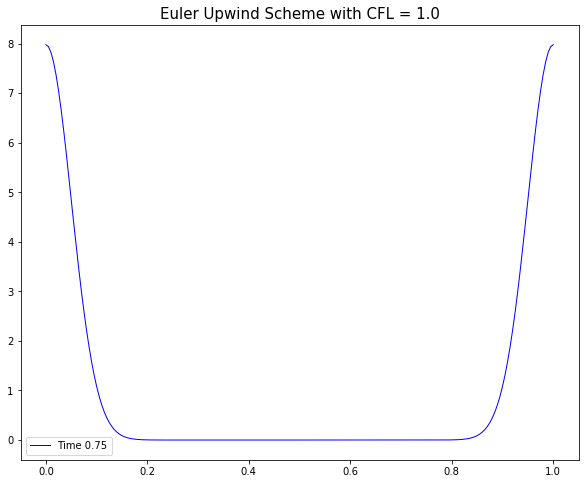

In [6]:
x = obj1.grid_points(0.0,L_max,L_max/N_size)
time_grid = obj1.grid_points(0.0,T_max,T_max/M_size)

plt.figure(figsize=(10,8))
indexx = 300
plt.plot(x,y1[indexx],linewidth = 1, c = 'b',label = f'Time {time_grid[indexx]}')
plt.title(f'Euler Upwind Scheme with CFL = {CFL_parameter}',fontsize = 15)
plt.legend()
plt.show()

In [7]:
N_sizes = 200
M_sizes = np.array([600,650,700,750,800,850,900,950,1000])

dts = T_max/M_sizes
dxs = L_max/N_sizes

print('dx: ', dx)
print('dt values: ',dts)

CFL_parameters = dts*a_val/dxs
print('CFL values: ',CFL_parameters)

dx:  0.005
dt values:  [0.0025     0.00230769 0.00214286 0.002      0.001875   0.00176471
 0.00166667 0.00157895 0.0015    ]
CFL values:  [1.         0.92307692 0.85714286 0.8        0.75       0.70588235
 0.66666667 0.63157895 0.6       ]


In [8]:
''' Make directory function '''
def make_dir(data_dir):
    if not os.path.exists(data_dir):
        os.makedirs(data_dir)

Run tests for different step sizes:

In [9]:
File_Euler = 'Euler_Solutions1D' # Binder name to store Euler Schemes Solutions
make_dir(File_Euler)

In [10]:
for idx,M_vals in enumerate(M_sizes):
    obj_euler = AdvectionSolvers.Euler_Upwind_1D(L_max,T_max,a_val,init_condition1,N_sizes,M_vals,os.path.join(File_Euler,'%.2f'%(CFL_parameters[idx])))
    obj_euler.run()

- Conservation of Total Mass:

In [11]:
masses = []
max_vals = []
for idx,CFL_value in enumerate(CFL_parameters):
    name = '%.2f'%(CFL_value) + '.txt'

    y_sol = np.loadtxt(os.path.join(File_Euler,name)).reshape(M_sizes[idx]+1,N_sizes+1)

    areas = []
    maxs = []
    for row in y_sol:
        
        areas.append(np.trapz(y = row, dx = dxs))
        maxs.append(max(row))
        
    masses.append(areas)
    max_vals.append(maxs)

In [12]:
len(masses[8])

1001

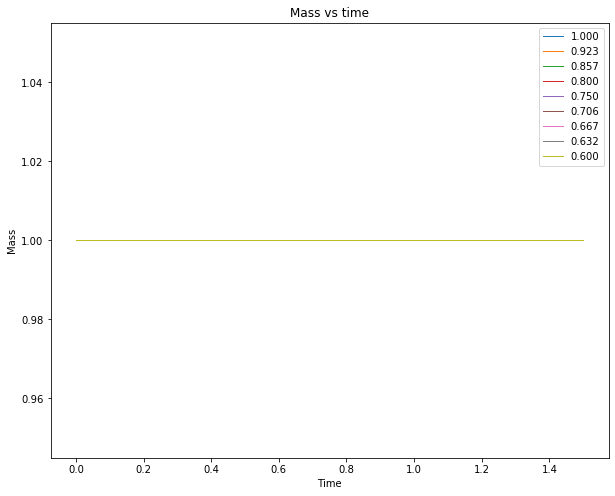

In [13]:
t_grids = [np.arange(0.0,T_max+dt_val,dt_val) for dt_val in dts]

plt.figure(figsize=(10,8))
for t_val,mass,CFL_p in zip(t_grids,masses,CFL_parameters): 
    if len(t_val) == len(mass):
        plt.plot(t_val,mass,linewidth=1,label='%.3f'%(CFL_p))
    else:
        t_val = list(t_val)
        t_val.pop(-1)
        plt.plot(t_val,mass,linewidth=1,label='%.3f'%(CFL_p))
plt.title('Mass vs time')
plt.xlabel('Time')
plt.ylabel('Mass')
plt.legend()
plt.show()

- Maximum of u:

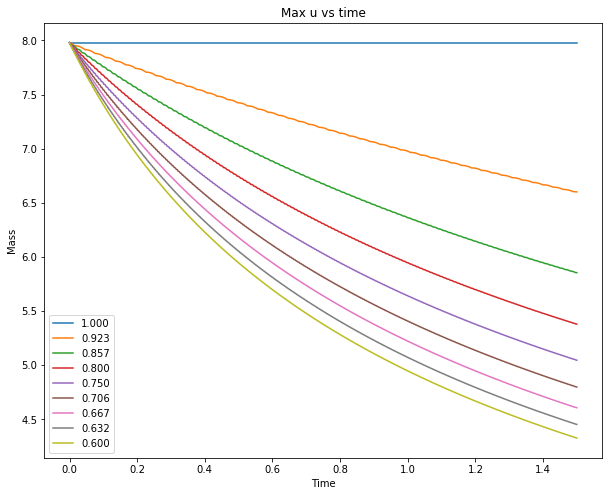

In [14]:
plt.figure(figsize=(10,8))
for t_val,max_val,CFL_p in zip(t_grids,max_vals,CFL_parameters): 
    if len(t_val) == len(max_val):
        plt.plot(t_val,max_val,linewidth=1.5,label='%.3f'%(CFL_p))
    else:
        t_val = list(t_val)
        t_val.pop(-1)
        plt.plot(t_val,max_val,linewidth=1.5,label='%.3f'%(CFL_p))
plt.title('Max u vs time')
plt.xlabel('Time')
plt.ylabel('Mass')
plt.legend()
plt.show()

#### b) Lax-Wendroff Scheme

$$ u_j^{n+1} = u_j^{n} - \frac{a \Delta t}{2 h} \big( u_{j+1}^{n} - u_{j-1}^n \big) + \frac{a^2 \Delta t^2}{2 h^2} \big(u_{j+1}^n - 2 u_j^n + u_{j-1}^n \Big)$$

In [15]:
# Create Class and run model
obj2 = AdvectionSolvers.Lax_Wendroff_1D(L_max,T_max,a_val,init_condition1,N_size,M_size,'Solution_Lax_Wendroff')
obj2.run()

In [16]:
y2 = np.loadtxt("Solution_Lax_Wendroff.txt").reshape(M_size+1,N_size+1)
print(y2.shape)

(601, 201)


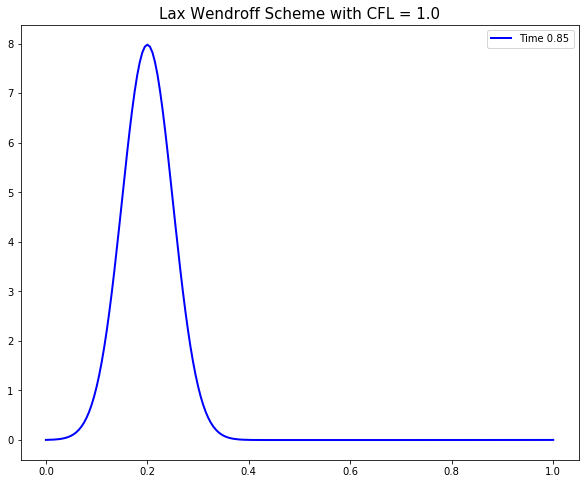

In [17]:
plt.figure(figsize=(10,8))
ind = 340
plt.plot(x,y2[ind],linewidth = 2, c = 'b',label = f'Time {time_grid[ind]}')
plt.title(f'Lax Wendroff Scheme with CFL = {CFL_parameter}',fontsize = 15)
plt.legend()
plt.show()

In [18]:
N_sizes = 200
M_sizes = np.array([600,650,700,750,800,850,900,950,1000])

dts = T_max/M_sizes
dxs = L_max/N_sizes

print('dx: ', dx)
print('dt values: ',dts)

CFL_parameters = dts*a_val/dxs
print('CFL values: ',CFL_parameters)

dx:  0.005
dt values:  [0.0025     0.00230769 0.00214286 0.002      0.001875   0.00176471
 0.00166667 0.00157895 0.0015    ]
CFL values:  [1.         0.92307692 0.85714286 0.8        0.75       0.70588235
 0.66666667 0.63157895 0.6       ]


In [19]:
File_Lax = 'Lax_Solutions1D' # Binder name to store Euler Schemes Solutions
make_dir(File_Lax)

In [20]:
for idx,M_vals in enumerate(M_sizes):
    obj_lax = AdvectionSolvers.Lax_Wendroff_1D(L_max,T_max,a_val,init_condition1,N_sizes,M_vals,os.path.join(File_Lax,'%.2f'%(CFL_parameters[idx])))
    obj_lax.run()

- Conservation of Total Mass:

In [21]:
masses = []
max_vals = []
for idx,CFL_value in enumerate(CFL_parameters):
    name = '%.2f'%(CFL_value) + '.txt'

    y_sol = np.loadtxt(os.path.join(File_Lax,name)).reshape(M_sizes[idx]+1,N_sizes+1)

    areas = []
    maxs = []
    for row in y_sol:
        
        areas.append(np.trapz(y = row, dx = dxs))
        maxs.append(max(row))
        
    masses.append(areas)
    max_vals.append(maxs)

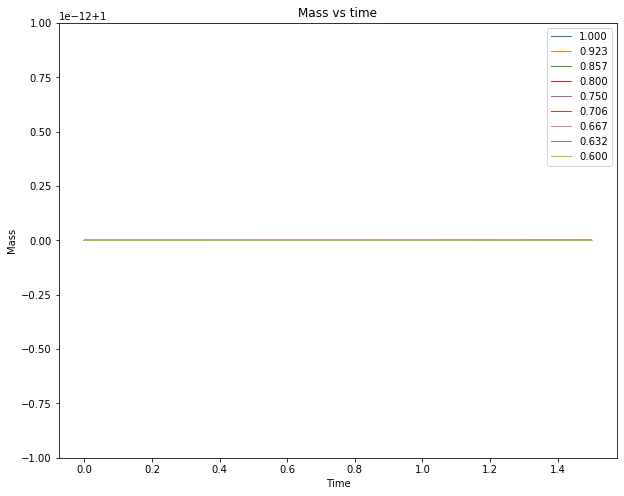

In [22]:
t_grids = [np.arange(0.0,T_max+dt_val,dt_val) for dt_val in dts]

plt.figure(figsize=(10,8))
for t_val,mass,CFL_p in zip(t_grids,masses,CFL_parameters):
    if len(t_val) == len(mass):
        plt.plot(t_val,mass,linewidth=1,label='%.3f'%(CFL_p))
    else:
        t_val = list(t_val)
        t_val.pop(-1)
        plt.plot(t_val,mass,linewidth=1,label='%.3f'%(CFL_p))
plt.title('Mass vs time')
plt.xlabel('Time')
plt.ylabel('Mass')
plt.legend()
plt.show()

- Maximum of u:

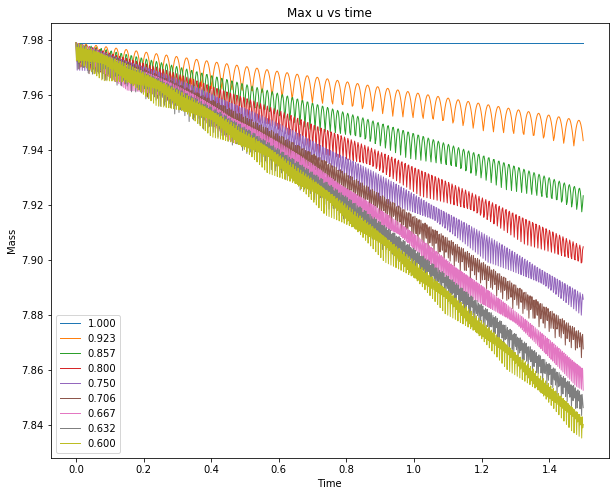

In [23]:
plt.figure(figsize=(10,8))
for t_val,max_val,CFL_p in zip(t_grids,max_vals,CFL_parameters): 
    if len(t_val) == len(max_val):
        plt.plot(t_val,max_val,linewidth=1.,label='%.3f'%(CFL_p))
    else:
        t_val = list(t_val)
        t_val.pop(-1)
        plt.plot(t_val,max_val,linewidth=1.,label='%.3f'%(CFL_p))
plt.title('Max u vs time')
plt.xlabel('Time')
plt.ylabel('Mass')
plt.legend()
plt.show()

#### b) Spectral Scheme

$$ \hat{u}_k^{n+1} = \exp\bigg[\frac{-2\pi i}{L}k a \Delta t\bigg] \hat{u}_k^{n} , \space \space \space \space \space k = -N/2,\dots,N/2-1 $$

Where $\hat{u}_k = P^*_{kj}u_j$ is the $k$-th Fourier mode.

In [24]:
obj3 = AdvectionSolvers.Spectral_Method_1D(L_max,T_max,a_val,init_condition1,N_size,M_size,'Solution_Spectral_Method')
obj3.run()

In [25]:
y3 = np.loadtxt("Solution_Spectral_Method.txt").reshape(M_size+1,N_size+1)
y3.shape

(601, 201)

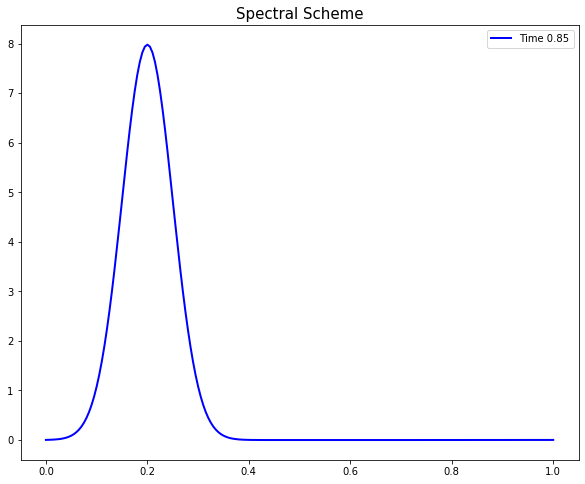

In [26]:
plt.figure(figsize=(10,8))
ind = 340
plt.plot(x,y3[ind],linewidth = 2, c = 'b',label = f'Time {time_grid[ind]}')
plt.title(f'Spectral Scheme',fontsize = 15)
plt.legend()
plt.show()

#### Evaluate the $L^2$ norm of the three algorithms across time

#### Analytical solution to the model:

$$ u(x,t)=\frac{1}{(2\pi\sigma^2)^{1/2}}\exp\bigg(-\frac{(x-at-L/2)^2}{2\sigma^2}\bigg)$$

In [27]:
def analytical_solution(x,t,sigma,L,a):
    return 1.0/(2.0*np.pi*(sigma**2))**(1/2) * np.exp(-((( x - a*t )%L - L/2)**2)/(2*sigma**2))

In [28]:
Analytical_Solutions = np.array([analytical_solution(x,t1,sig,L_max,a_val) for t1 in time_grid])
Analytical_Solutions.shape

(601, 201)

In [29]:
def error_func(y1,y2):
    '''Calculate the difference between to arrays'''
    y1 = np.array(y1)
    y2 = np.array(y2)
    if np.array(y1).shape == np.array(y2).shape:
        diff = y1-y2
        return diff
    else:
        print('Arrays must have the same dimension')

In [30]:
def calculate_norm(vector,norm_number):
    '''vector: Array or vector to which you want to determine the norm: 1,2 or inf
       norm_number: Norm order'''
    if type(norm_number) == str:
        return np.linalg.norm(vector,ord = float(norm_number))
    else:
        return np.linalg.norm(vector , ord = norm_number)

In [31]:
norms_schemes = {'Spectral Scheme':[],'Lax-Wendroff Scheme':[],'Euler Upwind Scheme':[]}
for anal_sol,spec_sol,euler_sol,lax_sol in zip(Analytical_Solutions,y3,y1,y2):
    error_spec = error_func(anal_sol,spec_sol)
    error_euler = error_func(anal_sol,euler_sol)
    error_lax = error_func(anal_sol,lax_sol)
    
    norms_schemes['Spectral Scheme'].append(calculate_norm(error_spec,2))
    norms_schemes['Euler Upwind Scheme'].append(calculate_norm(error_euler,2))
    norms_schemes['Lax-Wendroff Scheme'].append(calculate_norm(error_lax,2))

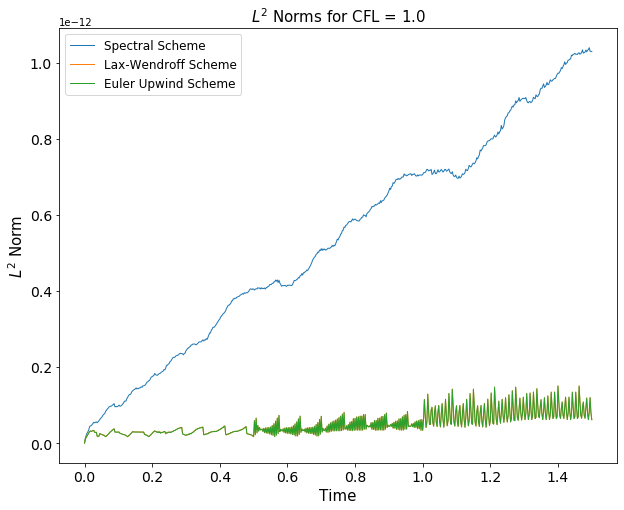

In [32]:
plt.figure(figsize=(10,8))

for nor in norms_schemes:
    plt.plot(time_grid , norms_schemes[nor] , linewidth=1 , label = nor)

plt.xlabel('Time',fontsize=15)
plt.ylabel('$L^2$ Norm',fontsize=15)
plt.title(f'$L^2$ Norms for CFL = {CFL_parameter}',fontsize = 15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=12)
plt.show()

In [33]:
M_size2 = 690

dt2 = T_max/M_size2

CFL_parameter2 = dt2*a_val/dx
print('Courant–Friedrichs–Lewy parameter: ',CFL_parameter2)

Courant–Friedrichs–Lewy parameter:  0.8695652173913043


In [34]:
obj_Euler1 = AdvectionSolvers.Euler_Upwind_1D(L_max , T_max , a_val,init_condition1,N_size,M_size2,"Solution_Euler")
obj_Euler1.run()
y_Euler1 = np.loadtxt("Solution_Euler.txt").reshape(M_size2+1,N_size+1)
y_Euler1.shape

(691, 201)

In [35]:
obj_Lax1 = AdvectionSolvers.Lax_Wendroff_1D(L_max , T_max , a_val , init_condition1,N_size,M_size2,"Solution_Lax_Wendroff")
obj_Lax1.run()
y_Lax1 = np.loadtxt("Solution_Lax_Wendroff.txt").reshape(M_size2+1,N_size+1)
y_Lax1.shape

(691, 201)

In [36]:
obj_Spectral1 = AdvectionSolvers.Spectral_Method_1D(L_max , T_max , a_val , init_condition1 , N_size 
                                                    , M_size2 , "Solution_Spectral_Method")
obj_Spectral1.run()
y_Spectral1 = np.loadtxt("Solution_Spectral_Method.txt").reshape(M_size2+1,N_size+1)
y_Spectral1.shape

(691, 201)

In [37]:
times1 = obj_Euler1.grid_points(0.0,T_max,dt2)
Analytical_Solutions1 = np.array([analytical_solution( x , t1 , sig , L_max , a_val) for t1 in times1])
Analytical_Solutions1.shape

(691, 201)

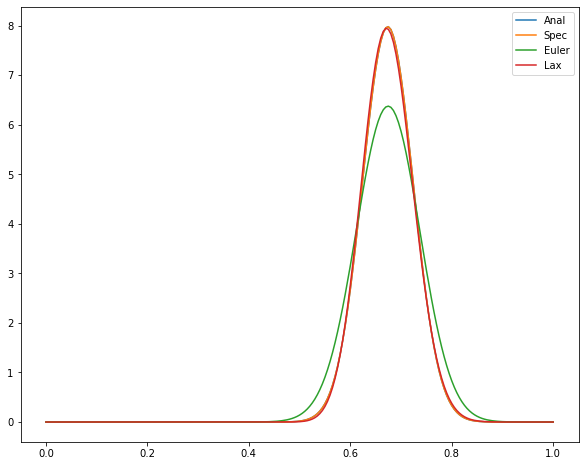

In [38]:
plt.figure(figsize=(10,8))
plt.plot(x,Analytical_Solutions1[500],label='Anal')
plt.plot(x,y_Spectral1[500],label='Spec')
plt.plot(x,y_Euler1[500],label='Euler')
plt.plot(x,y_Lax1[500],label = 'Lax')
plt.legend()
plt.show()

In [39]:
norms_schemes1 = {'Spectral Scheme':[],'Lax-Wendroff Scheme':[],'Euler Upwind Scheme':[]}
for anal_sol,spec_sol,euler_sol,lax_sol in zip(Analytical_Solutions1 , y_Spectral1 , y_Euler1 , y_Lax1):
    error_spec = error_func(anal_sol,spec_sol)
    error_euler = error_func(anal_sol,euler_sol)
    error_lax = error_func(anal_sol,lax_sol)
    
    norms_schemes1['Spectral Scheme'].append(calculate_norm(error_spec,2))
    norms_schemes1['Euler Upwind Scheme'].append(calculate_norm(error_euler,2))
    norms_schemes1['Lax-Wendroff Scheme'].append(calculate_norm(error_lax,2))

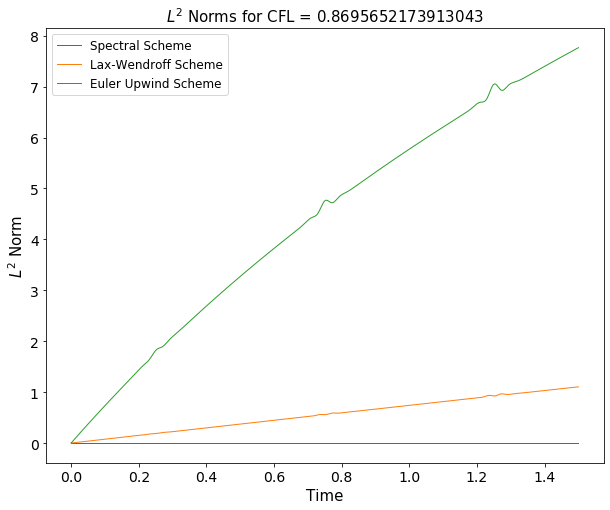

In [40]:
plt.figure(figsize=(10,8))

for nor in norms_schemes1:
    plt.plot(times1,norms_schemes1[nor] , linewidth=1 , label = nor)

plt.xlabel('Time',fontsize=15)
plt.ylabel('$L^2$ Norm',fontsize=15)
plt.title(f'$L^2$ Norms for CFL = {CFL_parameter2}',fontsize = 15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=12)
plt.show()